# Exploratory Analysis - stock

In [1]:
# ToDo: SQL facility

In [2]:
# Stats of interest:
# Greatest volatility one day? Num records. Avg close. Avg volatility one day. Growth (total, 1yr, 5yr, etc)

## Read

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.close("all")

In [5]:
rs = pd.read_csv("stock_market_data-AAPL.csv", index_col=0, parse_dates=["Date"])

In [6]:
rs = rs.reindex(index=rs.index[::-1])

In [7]:
rs.head()

,Date,Low,High,Close,Open
0,1999-11-01,77.37,80.69,77.62,80.00
1,1999-11-02,77.31,81.69,80.25,78.00
2,1999-11-03,81.00,83.25,81.50,81.62
3,1999-11-04,80.62,85.37,83.62,82.06
4,1999-11-05,84.00,88.37,88.31,84.62


In [8]:
date, close, ope = rs["Date"], rs["Close"], rs["Open"]

## SQL

#### Load

In [9]:
# %run "sqls.py"

In [10]:
import sqlite3
con = sqlite3.connect("test.db")

In [11]:
rs.to_sql("stock", con)

ValueError: Table 'stock' already exists.

In [12]:
cur = con.cursor()

In [13]:
res = cur.execute("SELECT * FROM stock LIMIT 10")

In [14]:
res.fetchall()

[(0, '1999-11-01 00:00:00', 77.37, 80.69, 77.62, 80.0),
 (1, '1999-11-02 00:00:00', 77.31, 81.69, 80.25, 78.0),
 (2, '1999-11-03 00:00:00', 81.0, 83.25, 81.5, 81.62),
 (3, '1999-11-04 00:00:00', 80.62, 85.37, 83.62, 82.06),
 (4, '1999-11-05 00:00:00', 84.0, 88.37, 88.31, 84.62),
 (5, '1999-11-08 00:00:00', 86.75, 97.73, 96.37, 87.75),
 (6, '1999-11-09 00:00:00', 88.0, 94.5, 89.62, 94.37),
 (7, '1999-11-10 00:00:00', 88.12, 93.25, 91.44, 88.25),
 (8, '1999-11-11 00:00:00', 89.87, 92.62, 92.25, 91.59),
 (9, '1999-11-12 00:00:00', 87.37, 92.0, 90.62, 91.94)]

#### Query

In [15]:
# Find 1 yr, 5 yr, 10 yr growth???

In [16]:
import sqlite3
con = sqlite3.connect("test.db")
cur = con.cursor()

In [17]:
yrs_lookback = [1, 3, 5, 10, 20]
for yr_lookback in yrs_lookback:
    x_yr_close_sql = ("""
        WITH stock_date AS (
            SELECT DATE(date) as Date1, *
            FROM stock
        ),
        
        one_yr_prior AS (
            SELECT close
            FROM stock_date
            WHERE Date1 = (
                SELECT DATE(
                     (SELECT MAX(date) FROM stock) --most recent date
                , '-%d year') AS date --minus 1 year
            )
        )
         
        SELECT * FROM one_yr_prior;
    """ % yr_lookback)
    # Completed: poke nested subqueries
    # Completed: debug number as first character of table name??? Ugh
    # Completed: see why compound query below returns empty
        # Completed: Is it like string formatting, test equality thing???
    
    
    res = cur.execute(x_yr_close_sql).fetchone()[0]
    
    
    todayish_close_sql = "SELECT close FROM stock WHERE date = (SELECT MAX(date) FROM stock)"
    res1 = cur.execute(todayish_close_sql).fetchone()[0]
    
    
    print("%d yr growth: %f" % (yr_lookback, (res1 / res)))

1 yr growth: 0.379885
3 yr growth: 0.755546
5 yr growth: 1.486653
10 yr growth: 0.403741
20 yr growth: 6.446664


This is saying the 1yr growth is 1/3 (nontrivially <1)

In [18]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 0 to 5453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5454 non-null   datetime64[ns]
 1   Low     5454 non-null   float64       
 2   High    5454 non-null   float64       
 3   Close   5454 non-null   float64       
 4   Open    5454 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 255.7 KB


In [19]:
(rs['Date'] < pd.to_datetime("2020-07-10")) & (rs['Date'] > pd.to_datetime("2020-07-01"))

0       False
1       False
2       False
3       False
4       False
        ...  
5449    False
5450    False
5451    False
5452    False
5453    False
Name: Date, Length: 5454, dtype: bool

In [20]:
rs.iloc[[5201]]['Date'].values

array(['2020-07-06T00:00:00.000000000'], dtype='datetime64[ns]')

## Model

In [21]:
%run "main.py"
# for RSMEs??

stock_market_data-AAPL.csv read
   Unnamed: 0       Date      Low    High   Close    Open
0        5453 2021-07-06  140.070  143.15  142.02  140.07
1        5452 2021-07-02  137.745  140.00  139.96  137.90
2        5451 2021-07-01  135.760  137.33  137.27  136.60
3        5450 2021-06-30  135.870  137.41  136.96  136.17
4        5449 2021-06-29  134.350  136.49  136.33  134.80



X(10) formed. Head:
[0     142.02
1     139.96
2     137.27
3     136.96
4     136.33
5     134.78
6     133.11
7     133.41
8     133.70
9     133.98
10    132.30
Name: Close, dtype: float64]
Y(10) formed. Head:
[130.46]



Y_prime:
[135.8018181818182, 134.7509090909091, 134.0081818181818, 133.3609090909091, 132.69545454545457, 132.16363636363639, 131.4881818181818, 130.85181818181815, 130.28090909090906, 129.6481818181818]
Y_prime:
[132.3604761904762, 131.59238095238095, 130.81047619047618, 130.2290476190476, 129.6252380952381, 129.06714285714284, 128.6147619047619, 128.3166666666667, 128.00666666666672, 127

In [22]:
# Done: update python kernel

In [23]:
# ToDo: write RMSEs to file, and read

## Evaluation

In [24]:
p1, p2, p3 = 3.937712725904051, 5.254558750029378, 5.882885391599708
p1, p2, p3

(3.937712725904051, 5.254558750029378, 5.882885391599708)

In [25]:
ns = pd.Series([p1, p2, p3])

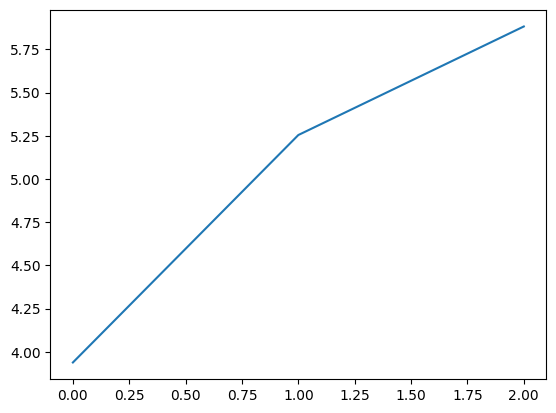

In [26]:
%matplotlib inline
ns.plot();

### Light stats

In [27]:
avg_close = rs["Close"].mean()
avg_close

174.747033076641

In [28]:
# Dataset total record cnt
len(rs)

5454

In [29]:
# First and last dates of dataset
min(date), max(date)

(Timestamp('1999-11-01 00:00:00'), Timestamp('2021-07-06 00:00:00'))

In [30]:
close.describe()

count    5454.000000
mean      174.747033
std       157.542041
min        13.120000
25%        63.885000
50%       124.390000
75%       215.887500
max       702.100000
Name: Close, dtype: float64

In [31]:
# Growth from earliest to most recent
close[len(close) - 1] - close[0]

64.4

### Deltas

In [32]:
# Delta day to day

In [33]:
delta_l = []
for i in range(1, len(close)):
    delta_l.append((close[i] - close[i - 1]) / close[i])
delta = pd.Series(delta_l)
delta.head()

0    0.032773
1    0.015337
2    0.025353
3    0.053108
4    0.083636
dtype: float64

In [34]:
delta.describe()

count    5453.000000
mean       -0.001353
std         0.094810
min        -5.889755
25%        -0.010479
50%         0.000887
75%         0.013064
max         0.122075
dtype: float64

In [35]:
delta.median()

0.0008872188299150144

In [36]:
# This is telling me the mean delta is negative, but the median is positive? That's interesting. And I think ok -
# 50% of the data points above, 50% below. And the 75% quartile is .013 and the 25% quartile is -.010. 
# Though the min is more extreme than the max.
# And also, we don't have every day continuously from the earliest date to the latest date. 

In [37]:
# Average volatility in a day

In [38]:
day_delta = close - ope
day_delta.head()

0   -2.38
1    2.25
2   -0.12
3    1.56
4    3.69
dtype: float64

In [39]:
day_delta.mean(), day_delta.median()

(-0.014265511551154885, 0.039999999999995595)

In [40]:
# Next Steps: visualization? 
# i.e. visualize the RSMEs

### Lower Priority?

In [41]:
# Dataset record count by year

In [42]:
year = date.dt.year
year.head()

0    1999
1    1999
2    1999
3    1999
4    1999
Name: Date, dtype: int32

In [43]:
year.value_counts().sort_index()

Date
1999     43
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    127
Name: count, dtype: int64